# Tópico 11 – Simulação [<img src="images/colag_logo.svg" style="float: right; vertical-align: middle; width: 42px; height: 42px;">](https://colab.research.google.com/github/urielmoreirasilva/urielmoreirasilva.github.io/blob/main/aulas/T%C3%B3pico%2011/11%20%E2%80%93%20Simulacao.ipynb) [<img src="images/github_logo.svg" style="float: right; margin-right: 12px; vertical-align: middle; width: 36px; height: 36px;">](https://github.com/urielmoreirasilva/urielmoreirasilva.github.io/blob/main/aulas/T%C3%B3pico%2011/11%20%E2%80%93%20Simulacao.ipynb)

A simulação de dados é essencial na Estatística e em Ciência de Dados. Vamos aprender a combinar o que aprendemos sobre iteração e sobre arrays para realizar simulações e aproximar probabilidades!

### Resultados Esperados

1. Introduzir método `np.random` para simulação.
1. Aprender sobre como utilizar simulação para aproximar probabilidades.
1. Discutir sobre o uso das simulações como uma alternativa às soluções exatas para problemas complexos.

### Referências
- [CIT, Capítulo 9](https://inferentialthinking.com/)

Material adaptado do [DSC10 (UCSD)](https://dsc10.com/) por [Flavio Figueiredo (DCC-UFMG)](https://flaviovdf.io/fcd/) e [Uriel Silva (DEST-UFMG)](https://urielmoreirasilva.github.io)

In [2]:
# Imports: Matplotlib, Numpy, BabyPandas e Pandas.
import matplotlib.pyplot as plt
import numpy as np
import babypandas as bpd
import pandas as pd
plt.style.use('ggplot')

## Simulação

### Ideias básicas

- Suponha que queiramos responder a seguinte pergunta: "Qual é a probabilidade de obtermos 60 ou mais caras no lançamento de 100 moedas (justas)?" 🤔

- Embora com certeza _seja possível_ calcular essa probabilidade "manualmente", isto é, utilizando Matemática e Probabilidade, podemos também aproximá-la utilizando um computador:
  
1. Descubra como fazer o experimento correspondente (ou seja, jogar 100 moedas).
1. Execute o experimento várias vezes.
1. Encontre a proporção de experimentos em que o número de caras foi igual a 60 ou mais.

- Nesse curso, esse será nosso principal uso para técnicas de **simulação**.
- Isto, é, utilizaremos simulação para aproximar a solução _exata_ do problema no qual estamos interessados.
- Embora a maior parte dos problemas que trabalharemos nesse curso _admitam soluções analíticas_, técnicas de simulação são facilmente generalizáveis para os casos onde uma solução analítica seja muito complicada algebricamente, numericamente instável, ou muitas vezes **nem exista**.

- Apesar do poder das técnicas de simulação ser evidente quando aplicadas para resolver problemas complexos, devemos sempre lembrar que a simulação nos dá sempre uma solução **aproximada**.
    - Na maior parte das situações, podemos escolher o quão _boa_ essa aproximação será (em geral ao custo de um esforço computacional maior).
- De qualquer maneira, é sempre uma boa ideia realizarmos uma **análise de sensibilidade** para tentar detectar se nossas aproximações sofrem de algum **viés**, ou **erro sistemático**. 

### Simulando um experimento aleatório

- Para simular um experimento aleatório, precisamos de uma função adequada para gerar _números aleatórios_ no computador.
- Esses números então serão utilizados para representar os resultados de um experimento aleatório (como por exemplo lançar uma moeda, lançar um dado, etc.).

- Uma função muito útil nesse contexto é `np.random.choice(options)`.
    - A entrada dessa função, `options`, é uma lista ou array com todos os possíveis resultados do experimento desejado.
    - A saída dessa função é um elemento selecionado aleatoriamente em `options`.
    - Como padrão, todos os elementos de `options` têm a mesma probabilidade de serem escolhidos, isto é, `np.random.choice` amostra probabilidades **uniformes**.

In [10]:
# Simulando o lançamento de uma moeda (justa).
# Nota: execute essa célula mais de uma vez para ver algo interessante!
np.random.choice(['Heads', 'Tails'])

'Tails'

In [11]:
# Simulando o lançamento de uma dado (de 6 lados).
# Nota: execute essa célula mais de uma vez para ver algo interessante!
np.random.choice(np.arange(1, 7))

4

### Simulando múltiplos experimentos aleatórios

- Para simularmos `n` experimentos aleatórios, basta invocar `np.random.choice(options, n)`.
- A saída correspondente será um array de `n` elementos selecionados aleatoriamente de `options`.

In [13]:
# Simulando o lançamento de 10 moedas (justas).
# Nota: execute essa célula mais de uma vez para ver algo interessante!
np.random.choice(['Heads', 'Tails'], 10)

array(['Tails', 'Tails', 'Heads', 'Heads', 'Tails', 'Tails', 'Tails',
       'Tails', 'Heads', 'Heads'], dtype='<U5')

### Com reposição ou sem reposição? 🤔

- Como padrão, `np.random.choice` seleciona elementos de `options` **com** reposição.
- Isso significa que, após uma opção ser selecionada, essa opção estará disponível para ser selecionada novamente!

- Por exemplo, se ao retirarmos uma bola de gude de um saco, anotarmos alguma característica de interesse e a colocarmos de volta, estaremos selecionando _com_ reposição.
- Por outro lado, se ao retirarmos a bola de gude do saco não a colocarmos de volta, estaremos selecionando _sem_ reposição.

- Para selecionar **sem** reposição, basta invocar `np.random.choice` com a opção `replace = False`.

In [17]:
# Nesse exemplo, cada elemento de `college` é selecionado apenas uma vez.
colleges = ['Revelle', 'John Muir', 'Thurgood Marshall', 
            'Earl Warren', 'Eleanor Roosevelt', 'Sixth', 'Seventh']

np.random.choice(colleges, 3, replace = False)

array(['Earl Warren', 'Eleanor Roosevelt', 'Revelle'], dtype='<U17')

## Simulando probabilidades

### Exemplo: Probabilidade de obter 60 ou mais caras no lançamento de 100 moedas

Voltando à nossa pergunta original, vamos detalhar abaixo cada um dos passos da estratégia de simulação que delineamos anteriormente.

#### Passo 1: Descobrir como fazer o experimento 

- Nesse exemplo, podemos utilizar `np.random.choice` para simular o lançamento de 100 moedas:

In [38]:
coins = np.random.choice(['Heads', 'Tails'], 100)
coins

array(['Heads', 'Tails', 'Tails', 'Heads', 'Tails', 'Heads', 'Heads',
       'Tails', 'Heads', 'Tails', 'Tails', 'Heads', 'Heads', 'Heads',
       'Tails', 'Heads', 'Heads', 'Tails', 'Tails', 'Heads', 'Tails',
       'Heads', 'Tails', 'Heads', 'Tails', 'Heads', 'Tails', 'Heads',
       'Heads', 'Heads', 'Tails', 'Heads', 'Tails', 'Tails', 'Heads',
       'Heads', 'Heads', 'Tails', 'Heads', 'Tails', 'Heads', 'Heads',
       'Heads', 'Tails', 'Heads', 'Tails', 'Tails', 'Heads', 'Heads',
       'Tails', 'Heads', 'Tails', 'Tails', 'Heads', 'Tails', 'Heads',
       'Heads', 'Tails', 'Heads', 'Tails', 'Tails', 'Heads', 'Tails',
       'Tails', 'Heads', 'Heads', 'Heads', 'Heads', 'Heads', 'Tails',
       'Tails', 'Heads', 'Tails', 'Heads', 'Tails', 'Tails', 'Heads',
       'Tails', 'Tails', 'Heads', 'Heads', 'Tails', 'Heads', 'Tails',
       'Tails', 'Tails', 'Heads', 'Tails', 'Tails', 'Heads', 'Heads',
       'Tails', 'Tails', 'Heads', 'Tails', 'Heads', 'Tails', 'Tails',
       'Tails', 'Tai

e depois, podemos contar o número de caras utilizando a função `np.count_nonzero`:

In [45]:
np.count_nonzero(coins == 'Heads')

50

- Em essência, a função `np.count_nonzero(array)` retorna o número de entradas em `array` que são `True`.

In [53]:
coins == 'Heads'

array([ True, False, False,  True, False,  True,  True, False,  True,
       False, False,  True,  True,  True, False,  True,  True, False,
       False,  True, False,  True, False,  True, False,  True, False,
        True,  True,  True, False,  True, False, False,  True,  True,
        True, False,  True, False,  True,  True,  True, False,  True,
       False, False,  True,  True, False,  True, False, False,  True,
       False,  True,  True, False,  True, False, False,  True, False,
       False,  True,  True,  True,  True,  True, False, False,  True,
       False,  True, False, False,  True, False, False,  True,  True,
       False,  True, False, False, False,  True, False, False,  True,
        True, False, False,  True, False,  True, False, False, False,
       False])

Lembrando que as booleanas `True` e `False` são codificadas no Python como sendo iguas a 1 e 0, respectivamente, podemos alternativamente contar o número de caras através de:

In [58]:
(coins == 'Heads').sum()

50

Isso também motiva o nome da função `count_nonzero`: como `False == 0`, a função conta os elementos diferentes de 0, isto é, aqueles que são iguais a `True`. 

#### Interlúdio: Definindo uma função para simular o experimento aleatório

- Para facilitar a repetição do experimento (e aumentar a legibilidade do código), podemos definir uma função para executar o Passo 1 acima:

In [73]:
def coin_experiment():
    '''Simulates 100 (fair) coin tosses and returns the number of Heads.'''
    coins = np.random.choice(['Heads', 'Tails'], 100)
    return np.count_nonzero(coins == 'Heads')

In [81]:
coin_experiment?

Signature: coin_experiment()
Docstring: Simulates 100 (fair) coin tosses and returns the number of Heads.
File:      c:\users\uriel\appdata\local\temp\ipykernel_1160\3756918760.py
Type:      function

In [83]:
coin_experiment()

53

#### Passo 2: Repetir o experimento várias vezes

- Como vimos no Tópico 08, podemos repetir o mesmo código muitas vezes **utilizando um loop `for`!**
- Cada vez que simularmos o experimento, precisaremos armazenar os resultados em um array.
    - Faremos isso aqui através da função `np.append`.

Para ilustrar o uso do `np.append`, começamos com um array vazio:

In [191]:
head_counts = np.array([])
head_counts

array([], dtype=float64)

Fazemos então um append ao array existente:

In [193]:
head_counts = np.append(head_counts, 15)
head_counts

array([15.])

e mais um:

In [199]:
head_counts = np.append(head_counts, 25)
head_counts

array([15., 25., 25.])

... e assim por diante.

Nosso `for` para repetir o experimento aleatório várias vezes então fica assim:

In [207]:
# Número de repetições.
repetitions = 10000

# Começamos com um array vazio para armazenar os resultados.
head_counts = np.array([])

# Loop for.
for i in np.arange(repetitions):
    # For each repetition, run the experiment and add the result to head_counts
    head_count = coin_experiment()
    head_counts = np.append(head_counts, head_count)

In [209]:
len(head_counts)

10000

In [211]:
head_counts

array([53., 48., 61., ..., 49., 50., 44.])

#### Passo 3: Encontrar a proporção de experimentos em que o número de caras foi igual a 60 ou mais

- Calculamos agora então a proporção $\hat{p}$ dos experimentos em que o número de caras foi igual a 60 ou mais.
- Essa medida de _frequência_ nos fornece a **probabilidade estimada** do nosso evento, isto é, "obter 60 ou mais caras em 100 lançamentos de uma moeda".

O _número de experimentos_ em que o número de caras observado foi igual a 60 ou mais é:

In [224]:
at_least_60 = np.count_nonzero(head_counts >= 60)
at_least_60

311

e a _proporção correspondente_ $\hat{p}$, isto é, sobre todos as repetições do experimento aleatório, é igual a

In [228]:
p_hat = at_least_60 / repetitions
p_hat

0.0311

Lembrando que a soma das booleanas de uma array nos dá sempre o número de elementos que são iguais a `True`, a proporção $\hat{p}$ é igual a _média das booleanas correspondentes_, que em Probabilidade denominamos de **indicadoras da ocorrência de um evento**:

In [233]:
head_counts >= 60

array([False, False,  True, ..., False, False, False])

In [235]:
np.mean(head_counts >= 60)

0.0311

#### Visualizando a distribuição dos experimentos aleatórios simulados

- O histograma abaixo :
- Lembre que, 

- Este histograma descreve a distribuição do número de cabeças em cada experimento.
- Agora vemos outra razão para usar histogramas de densidade.
- Usar densidade significa que as áreas se aproximam de **probabilidades**.

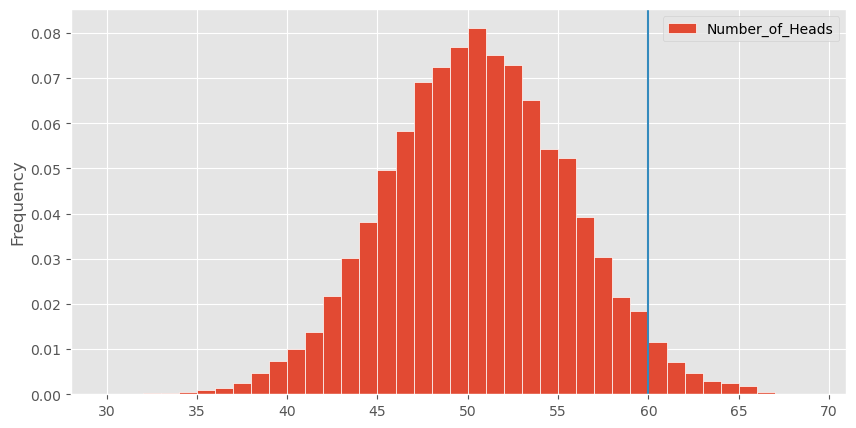

In [238]:
bpd.DataFrame().assign(
    Number_of_Heads=head_counts
).plot(kind='hist', bins=np.arange(30, 70), density=True, ec='w', figsize=(10, 5));
plt.axvline(60, color='C1');

#### Comparando o resultado simulado com o verdadeiro

Isso está bem próximo da verdadeira resposta teórica!

In [186]:
# The theoretical answer – don't worry about how or why this code works
import math
sum([math.comb(100, i) * (1 / 2) ** 100 for i in np.arange(60, 101)])

0.028443966820490392

binomial [*]

curva sobreposta com os verdadeiros valores da binomial

## Exemplo: O problema dos aniversários

In [166]:
import math as math
math.factorial(3)
math.comb(6, 2)

# print, change display (see other classes)

15

In [164]:
N = 23
probs = []
for n in np.arange(1, N + 1, 1):
    i_n = int(n)
    prob_an = 1 - (math.factorial(i_n) * math.comb(365, i_n)) / (365 ** i_n)
    probs = np.append(probs, prob_an)

prob = bpd.DataFrame()
prob.assign(n = np.arange(1, N + 1, 1), p_n = probs)

,n,p_n
0,1,0.000000
1,2,0.002740
2,3,0.008204
3,4,0.016356
4,5,0.027136
...,...,...
18,19,0.379119
19,20,0.411438
20,21,0.443688
21,22,0.475695


![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Monty_open_door.svg/1920px-Monty_open_door.svg.png)

### O problema de "Monty Hall"

Suponha que você esteja em um game show e tenha a opção de escolher entre três portas: atrás de uma porta está um carro 🚗; atrás dos outros, cabras 🐐🐐.

- Você escolhe uma porta, digamos a nº 2, e o anfitrião, **que sabe o que tem atrás das portas**, abre outra porta, digamos a nº 3, que tem uma cabra.

- Ele então diz para você: “Você quer escolher a porta número 1?”

- **Pergunta:** É vantajoso mudar de escolha?

_(A questão foi colocada na coluna "Ask Marilyn" da revista Parade em 1990. É chamada de "problema de Monty Hall" porque Monty Hall apresentou um game show semelhante chamado "Let's Make a Deal".)_

### Verificação de conceito ✅

Você selecionou originalmente a porta nº 2. O anfitrião revela que a porta nº 3 tem uma cabra atrás dela. O que você deveria fazer?

A. É melhor ficar com a porta número 2; tem chances tão altas de vencer quanto a porta número 1. Não importa se você muda ou não.

B. Mude para a porta número 1; tem uma chance maior de vencer do que a porta 2.

### Vamos ver 🤔

- Usaremos simulação para calcular:
- A probabilidade de ganhar se mudarmos.
- A probabilidade de ganhar se ficarmos.
- Qualquer estratégia que tenha maior probabilidade de ganhar é melhor!

### Hora de simular!

Vamos **simular** o problema de Monty Hall muitas vezes para **estimar** a probabilidade de vitória se mudarmos.

1. Descubra como simular um jogo de Monty Hall.
2. Jogue o jogo várias vezes, trocando a cada vez.
3. Conte a proporção de vitórias.

Então repetiremos o processo para ficar a cada vez.

### Passo 1: Simule um único jogo

Quando você escolhe uma porta, há três resultados igualmente prováveis:

1. Carro.
1. Cabra nº 1.
1. Cabra #2.

In [ ]:
behind_picked_door = np.random.choice(['Car', 'Goat #1', 'Goat #2'])
behind_picked_door

### Passo 1: Simule um único jogo

Quando Monty abre uma porta diferente, ele sempre revela uma cabra.

In [ ]:
if behind_picked_door == 'Goat #1':
    revealed = 'Goat #2'
elif behind_picked_door == 'Goat #2':
    revealed = 'Goat #1'
else:
    revealed = np.random.choice(['Goat #1', 'Goat #2'])

revealed

### Passo 1: Simule um único jogo

Se você sempre trocar, acabará ganhando o prêmio que não está nem `behind_picked_door` nem `revealed`.

In [ ]:
for prize in ['Car', 'Goat #1', 'Goat #2']:
    if prize != behind_picked_door and prize != revealed:
        your_prize = prize

your_prize

### Passo 1: Simule um único jogo

Vamos transformar isso em uma função para facilitar a repetição:

In [ ]:
def simulate_switch_strategy():
    behind_picked_door = np.random.choice(['Car', 'Goat #1', 'Goat #2'])
    
    if behind_picked_door == 'Goat #1':
        revealed = 'Goat #2'
    elif behind_picked_door == 'Goat #2':
        revealed = 'Goat #1'
    else:
        revealed = np.random.choice(['Goat #1', 'Goat #2'])
        
    for prize in ['Car', 'Goat #1', 'Goat #2']:
        if prize != behind_picked_door and prize != revealed:
            your_prize = prize
        
    #print(behind_picked_door, 'was behind the door.', revealed, 'was revealed by the host. Your prize was:', your_prize)
    return your_prize

In [ ]:
simulate_switch_strategy()

### Etapa 2: jogue o jogo várias vezes

Devemos guardar seu prêmio em cada jogo. Para fazer isso, vamos usar `np.append`:

In [ ]:
repetitions = 10000

your_prizes = np.array([])

for i in np.arange(repetitions):
    your_prize = simulate_switch_strategy()
    your_prizes = np.append(your_prizes, your_prize)

In [ ]:
your_prizes

### Etapa 3: contar a proporção de vitórias para esta estratégia (troca)

In [ ]:
your_prizes

In [ ]:
np.count_nonzero(your_prizes == 'Car')

In [ ]:
np.count_nonzero(your_prizes == 'Car') / repetitions

Isso está bem próximo da verdadeira probabilidade de ganhar se você trocar, $\frac{2}{3}$.

### Implementação alternativa

- Analisando nossa implementação, monitoramos seu prêmio em cada jogo.

- No entanto, tudo o que realmente precisávamos saber era o **número de jogos** em que você ganhou um carro.

- Ideia: Mantenha um registro do número de vezes que você ganhou um carro. Ou seja, inicialize `car_count` com 0 e adicione 1 sempre que seu prêmio for um carro.

In [ ]:
car_count = 0

In [ ]:
for i in np.arange(repetitions):
    your_prize = simulate_switch_strategy()
    if your_prize == 'Car':
        car_count = car_count + 1

In [ ]:
car_count / repetitions

Não são necessárias matrizes! Esta estratégia nem sempre funciona; depende do objetivo da simulação.

### E se você ficar sempre com sua porta original?

- Neste caso, o seu prêmio é sempre o mesmo que estava atrás da porta escolhida.

In [ ]:
car_count = 0

for i in np.arange(repetitions):
    behind_picked_door = np.random.choice(['Car', 'Goat #1', 'Goat #2'])
    your_prize = behind_picked_door
    if your_prize == 'Car':
        car_count = car_count + 1
        
car_count / repetitions

- Isso é bem próximo da verdadeira probabilidade de ganhar se você ficar, $\frac{1}{3}$.

- **Conclusão:** É melhor mudar.

- **Explicação:**
- Se você escolher originalmente uma cabra, Monty revelará a outra cabra e você ganhará o carro trocando.
- Se você escolher originalmente um carro, você ganhará ficando.
- Mas há 2 cabras e 1 carro, então você ganha o dobro trocando.

### Coluna de Marilyn vos Savant na revista Parade

![](https://parade.com/.image/ar_1:1%2Cc_fill%2Ccs_srgb%2Cfl_progressive%2Cq_auto:good%2Cw_1200/MTkwNTc4NzM1NjQ4MTU1NTE2/marilynfirstquestions.jpg)

<div style="display: flex; margem superior: 0,5 pol; margem direita: 1 pol">
<div style="largura: 85%;">
<ul>
<li>Quando um leitor fez esta pergunta, vos Savant afirmou a resposta correta: <i>switch</i>.</li>
<li>Ela recebeu mais de 10.000 cartas em desacordo, incluindo mais de 1.000 cartas de pessoas com doutorado.</li>
<li>Isso se tornou uma controvérsia nacional, recebendo até um <a href='https://www.nytimes.com/1991/07/21/us/behind-monty-hall-s-doors-puzzle-debate-and -answer.html'>artigo de primeira página do New York Times em 1991.</a></li>
</ul>
</div>
</div>


### Qual a intuição da resposta?

1. Abaixo temos todas as três configurções iniciais (nas linhas). Em duas delas, trocar é melhor. Em uma não.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Monty_Hall_Problem_-_Standard_probabilities.svg/1024px-Monty_Hall_Problem_-_Standard_probabilities.svg.png)

## Resumo [*]

#### Simulação encontra probabilidades

- Calcular probabilidades é importante, mas pode ser difícil!
- Você aprenderá muitas fórmulas nas futuras aulas do DSC.
- A simulação nos permite encontrar probabilidades por meio da computação em vez da matemática.
- Muitos cenários do mundo real são complicados.
- A simulação é muito mais fácil que a matemática em muitos destes casos.

#### A "receita" da simulação

Para estimar a probabilidade de um evento por meio de simulação:
1. Crie uma função que execute o experimento uma vez.
2. Execute essa função muitas e muitas vezes (geralmente 10.000) com um loop `for` e salve os resultados em um array com `np.append`.
3. Calcule a proporção de vezes que o evento ocorre usando `np.count_nonzero`.